# Market Analysis and Strategic Insights for Launching a Café in Los Angeles

---
# Table of Contents <a id="mulai"></a>

[Introduction](#mulai)

[Analysis Stages](#tahapan)
1. [Data Preparation](#persiapan)
2. [Data Analysis](#analisis)
    * [Proportional Distribution by Business Type](#proporsi)
    * [Franchise vs Non-Franchise Breakdown](#basis)
    * [Business Categories Commonly Operated as Franchises](#jenis)
    * [Seat Count Distribution in Franchise-Based Businesses](#waralaba)
    * [Average Number of Seats per Business Category](#rataratakursi)
    * [Top Ten Streets by Business Density](#top10street)
    * [Count of Streets with Only One Business Establishment](#jumlahjalan)
    * [Seat Count Distribution on High-Density Streets](#distribusi)
3. [Conclusion](#kesimpulan)
4. [Recommendation](#rekomendasi)

---
# Introduction
<a id="mulai"></a>

In an era where technological innovation continues to advance rapidly, the food and beverage industry is no exception to this wave of transformation. Driven by a passion for delivering a unique customer experience, I have made the decision to open a small café in Los Angeles. This establishment not only offers delectable cuisine but also introduces an unconventional experience by employing robots as servers.

Naturally, this is a promising venture; however, realizing it requires a substantial amount of capital. As such, my partners and I have resolved to attract potential investors to back this project. That said, as an analyst, I am keenly aware of the importance of understanding current market dynamics and evaluating whether the café can maintain its appeal—particularly once the novelty of robotic servers begins to fade.

To build a compelling and well-founded business plan that resonates with investors, we conducted in-depth market research. We leveraged open-source data related to dining establishments across Los Angeles. Through a meticulous analysis, we aim to present a clear picture of the business potential and demonstrate how we intend to capitalize on prevailing market trends to ensure long-term success.

Let us begin by examining the data we have gathered.

[Back to Table of Contents](#back)

---
# Analysis Stages
<a id="tahapan"></a>

1. **Data Preparation**
- Download data related to various types of dining establishments in Los Angeles.
- Inspect data types for each column and ensure there are no missing or duplicate values.
- Perform preprocessing if necessary, such as data cleaning or column separation.

2. **Data Analysis**
- Proportional Distribution by Type of Establishment
- Franchise vs Non-Franchise Business Proportions
- Business Categories Commonly Operated as Franchises
- Seat Count Distribution in Franchise-Based Businesses
- Average Number of Seats per Business Type
- Top Ten Street Names by Number of Establishments
- Count of Streets Hosting a Single Business Establishment
- Seat Count Distribution on Streets with High Business Density

3. **Conclusion**

4. **Recommendations**

[Back to Table of Contents](#back)

---
## Data Preparation
<a id="persiapan"></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('data/cafe_market_data.csv')
data.head(20)

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20
5,11791,THE SPOT GRILL,10004 NATIONAL BLVD,False,Restaurant,14
6,11792,CPK,100 WORLD WAY 126,False,Restaurant,100
7,11793,PHO LALA,3500 W 6TH ST STE 226,False,Restaurant,7
8,11794,ABC DONUTS,3027 N SAN FERNANDO RD UNIT 103,True,Fast Food,1
9,11795,UPSTAIRS,3707 N CAHUENGA BLVD,False,Restaurant,35


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


In [7]:
# check missing values
data.isnull().sum()

id             0
object_name    0
address        0
chain          3
object_type    0
number         0
dtype: int64

In [8]:
# change data type 'chain' column into boolean
data['chain'] = data['chain'].astype(bool)

In [9]:
# clean and format address
data['address'] = data['address'].str.replace('#', '')

In [10]:
# delete duplicates
data.drop_duplicates(inplace=True)

In [11]:
# check duplicates
duplicate_rows = data.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)

Number of duplicate rows: 0


In [12]:
# extract street names from the address column
# inspect the results of the address parsing
split_address = data['address'].str.split(',', n=1, expand=True)
split_address.head()

data[['street', 'address_detail']] = data['address'].str.split(',', n=1, expand=True)

In [13]:
data.head(20)

,id,object_name,address,chain,object_type,number,street,address_detail
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,3708 N EAGLE ROCK BLVD,None
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9,100 WORLD WAY 120,None
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20,6801 HOLLYWOOD BLVD 253,None
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,1814 W SUNSET BLVD,None
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,2100 ECHO PARK AVE,None
5,11791,THE SPOT GRILL,10004 NATIONAL BLVD,False,Restaurant,14,10004 NATIONAL BLVD,None
6,11792,CPK,100 WORLD WAY 126,False,Restaurant,100,100 WORLD WAY 126,None
7,11793,PHO LALA,3500 W 6TH ST STE 226,False,Restaurant,7,3500 W 6TH ST STE 226,None
8,11794,ABC DONUTS,3027 N SAN FERNANDO RD UNIT 103,True,Fast Food,1,3027 N SAN FERNANDO RD UNIT 103,None
9,11795,UPSTAIRS,3707 N CAHUENGA BLVD,False,Restaurant,35,3707 N CAHUENGA BLVD,None


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              9651 non-null   int64 
 1   object_name     9651 non-null   object
 2   address         9651 non-null   object
 3   chain           9651 non-null   bool  
 4   object_type     9651 non-null   object
 5   number          9651 non-null   int64 
 6   street          9651 non-null   object
 7   address_detail  1 non-null      object
dtypes: bool(1), int64(2), object(5)
memory usage: 537.3+ KB


**Conclusion:**
- Column names are already in snake_case format
- The data type of the 'chain' column has been converted to boolean
- Null values have been cleaned
- No duplicate entries are present
- Street names have been successfully extracted from the address column

[Back to Table of Contents](#back)

---
## Data Analysis
<a id="analisis"></a>

### Proportional Distribution by Type of Establishment
<a id="proporsi"></a>

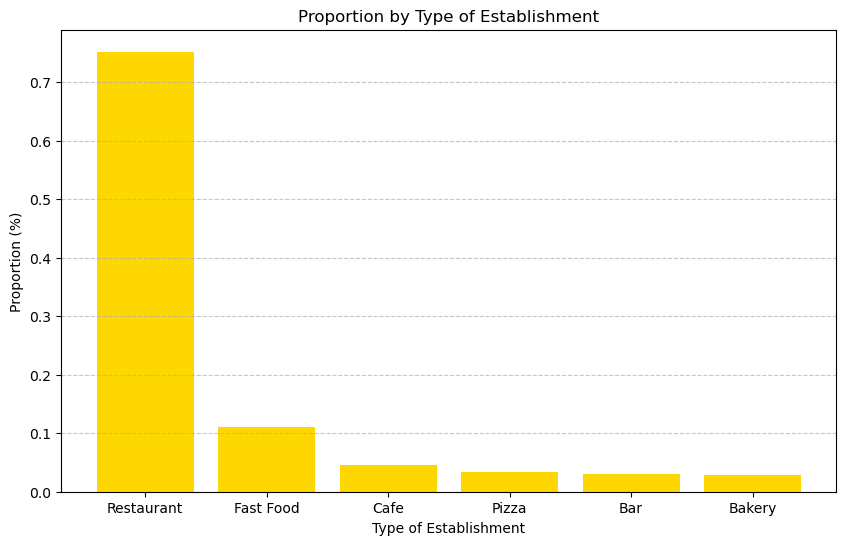

In [15]:
jenis_usaha_proporsi = data['object_type'].value_counts(normalize=True)

# create figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# create grafik batang
ax.bar(jenis_usaha_proporsi.index, jenis_usaha_proporsi, color='gold')

# add title dan label
ax.set_title('Proportion by Type of Establishment')
ax.set_xlabel('Type of Establishment')
ax.set_ylabel('Proportion (%)')

# add grid
ax.grid(axis='y', linestyle='--', alpha=0.7)

# show graphic
plt.show()

The chart above illustrates the proportion of various types of dining establishments in Los Angeles. In this analysis, we utilized the collected data to identify the dominant business categories within the city's food and beverage market.

From the chart, it is evident that **Restaurants** are the most prevalent type of establishment, followed by Fast Food outlets and Cafés. Restaurants hold a significantly larger share compared to other categories, indicating that they remain a primary choice for dining among Los Angeles residents.

Other business types such as **Pizza** joints, **Bars**, and **Bakeries** are also represented, albeit with smaller proportions relative to Restaurants, Cafés, and Fast Food establishments.

### Franchise vs Non-Franchise Business Proportions
<a id="basis"></a>

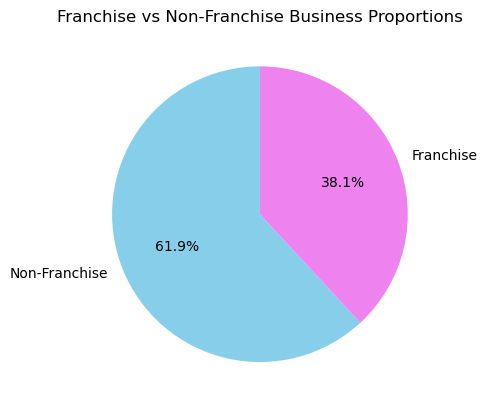

In [16]:
waralaba_proporsi = data['chain'].value_counts(normalize=True)

# crate label for pie chart
labels = ['Non-Franchise', 'Franchise']

# obtain proportion for every category
sizes = waralaba_proporsi.values

colors = ['skyblue', 'violet']

# create pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)

# add judul
ax.set_title('Franchise vs Non-Franchise Business Proportions')

# hide label y-axis
ax.set_ylabel('')

# show pie chart
plt.show()

The pie chart above illustrates the proportion of franchise and non-franchise dining establishments in Los Angeles. 
In this analysis, we utilized our collected dataset to distinguish between businesses that operate as franchises and those that do not.

The chart reveals that the majority of food establishments in Los Angeles are **Non-Franchise**, comprising approximately **61.9%** of the total. 
Meanwhile, **Franchise** businesses represent a smaller share, accounting for around **38.1%** of all dining venues in the city.

These findings suggest that although franchise-based establishments are present across Los Angeles, the market is predominantly composed of independently owned or non-franchise businesses. 
This insight provides a valuable perspective on the characteristics of the local food and beverage industry and can inform the strategic positioning of the new café to align with current market conditions.

### Business Categories Commonly Operated as Franchises
<a id="jenis"></a>

In [17]:
jenis_waralaba = data[data['chain']]['object_type'].value_counts()
print("Business Categories Commonly Operated as Franchises:")
print(jenis_waralaba)

Business Categories Commonly Operated as Franchises:
object_type
Restaurant    2294
Fast Food      605
Bakery         283
Cafe           266
Pizza          154
Bar             77
Name: count, dtype: int64


The type of business most commonly operated as a franchise is the **Restaurant**. 
This is evident from the significantly higher number of restaurants compared to other business categories within the franchise segment.

Restaurants account for a substantial total of 2,294, far surpassing other types such as Fast Food, Bakery, Café, Pizza, and Bar. 
This indicates that franchise-based restaurants have a strong market presence and are likely to be more widely encountered across various locations.

These findings may suggest that franchise restaurants typically pursue aggressive expansion strategies, establishing new branches throughout Los Angeles and potentially in other regions as well. 
Consequently, for investors seeking opportunities within the franchise sector, restaurants may represent an especially attractive option worth serious consideration.

### Seat Count Distribution in Franchise-Based Businesses
<a id="waralaba"></a>

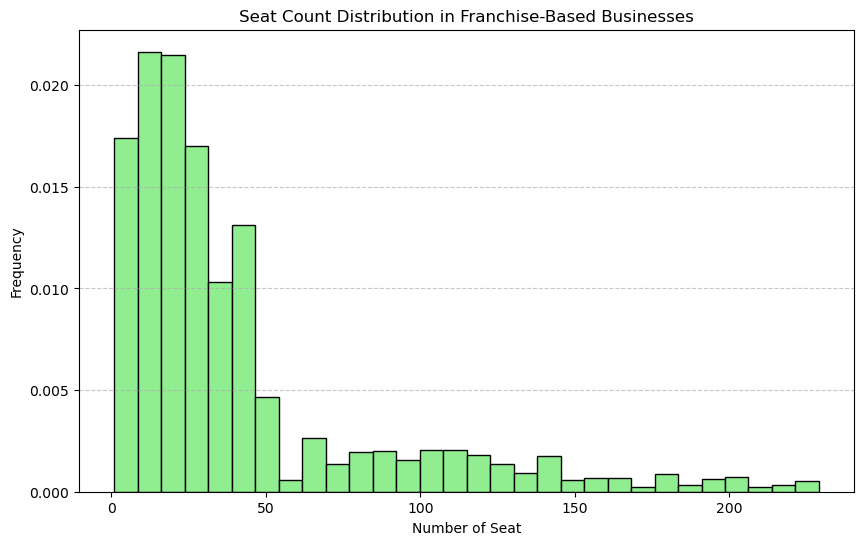

In [25]:
# filter data for franchise-based business
waralaba_data = data[data['chain'] == True]

# count the average seats for every franchise-based business
average_seats = waralaba_data.groupby('object_name')['number'].mean()

# check distribution of total seat
# creat figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# create histogram
ax.hist(average_seats, bins=30, color='lightgreen', edgecolor='black', density=True)

# add title dan axes label
ax.set_title('Seat Count Distribution in Franchise-Based Businesses')
ax.set_xlabel('Number of Seat')
ax.set_ylabel('Frequency')

# add grid
ax.grid(axis='y', linestyle='--', alpha=0.7)

# show graphic
plt.show()

The histogram above illustrates the distribution of seat counts in franchise-based dining establishments in Los Angeles.

From the chart, we can observe that the distribution tends to cluster around the 0–50 range. This suggests a common pattern in seating capacity among franchise businesses.

However, we can also identify a long right tail in the distribution, indicating the presence of several establishments with a significantly higher number of seats than the average. This implies that while the majority of franchise-based venues maintain relatively modest seating capacities, there are a few outliers with considerably larger setups.

In conclusion, based on the distribution of seat counts, we may infer that a key characteristic of franchise-based businesses is the prevalence of many small- to moderately-sized establishments, accompanied by a minority of larger venues with above-average seating capacity.

### Average Number of Seats per Business Type
<a id="rataratakursi"></a>

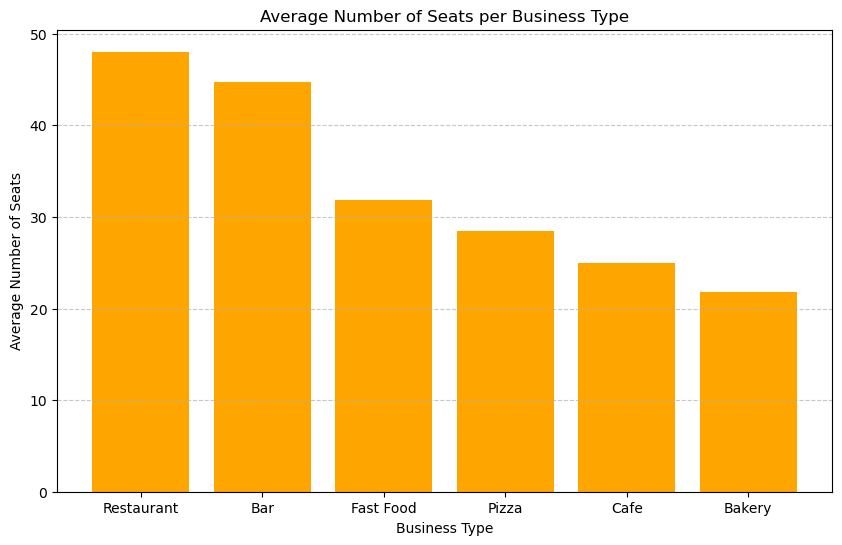

In [26]:
# count average total seats for every business type
avg_seats = data.groupby('object_type')['number'].mean().sort_values(ascending=False)

# create figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# creat grafik batang
ax.bar(avg_seats.index, avg_seats, color='orange')

# add title and axes label
ax.set_title('Average Number of Seats per Business Type')
ax.set_xlabel('Business Type')
ax.set_ylabel('Average Number of Seats')

# add grid
ax.grid(axis='y', linestyle='--', alpha=0.7)

# show graphic
plt.show()

The bar chart above presents the average number of seats for each type of dining establishment in Los Angeles. 
The averages were calculated based on the collected data and subsequently sorted in descending order.

From the chart, it is evident that **Restaurants** have the highest average seat count, followed by **Bars** and **Fast Food** establishments.**.

### Top Ten Street Names by Number of Establishments 
<a id="top10street"></a>

In [20]:
# move address name data  from address column to separate column
data['street_name'] = data['street'].str.strip()

In [21]:
import re

# function for removing number from address
def remove_numbers(address):
    return re.sub(r'\d+', '', address)

# remove numbers from address column
data['street_name'] = data['address'].apply(remove_numbers).str.strip()

# show outcome
data[['address', 'street_name']].head()

,address,street_name
0,3708 N EAGLE ROCK BLVD,N EAGLE ROCK BLVD
1,100 WORLD WAY 120,WORLD WAY
2,6801 HOLLYWOOD BLVD 253,HOLLYWOOD BLVD
3,1814 W SUNSET BLVD,W SUNSET BLVD
4,2100 ECHO PARK AVE,ECHO PARK AVE


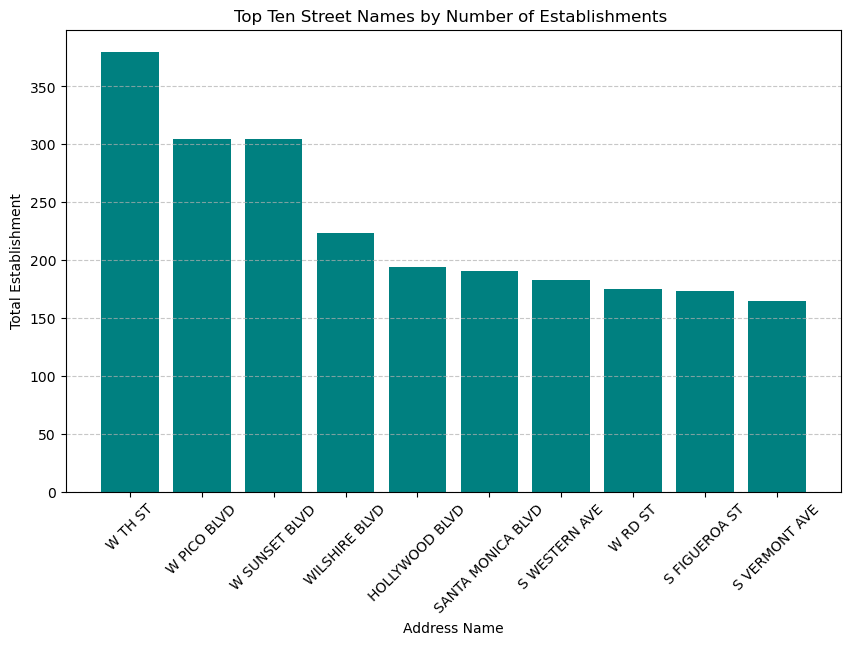

In [22]:
# extract data for top ten address name
top_10_streets = data['street_name'].value_counts().nlargest(10)

# create figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# create bar chart
ax.bar(top_10_streets.index, top_10_streets, color='teal')

# add title and axes label
ax.set_title('Top Ten Street Names by Number of Establishments ')
ax.set_xlabel('Address Name')
ax.set_ylabel('Total Establishment')

# label x-axis with 45 degree rotation
plt.xticks(rotation=45)

# add grid
ax.grid(axis='y', linestyle='--', alpha=0.7)

# show graphic
plt.show()

The bar chart above displays the top ten street names in Los Angeles based on the number of dining establishments located along each street.

From the chart, it is clear that **W TH St** hosts the highest number of food businesses among the top ten streets, followed by **W Pico Blvd** and **W Sunset Blvd**.

This suggests that these streets may be bustling areas for food and beverage activity in Los Angeles. Such insights are particularly valuable when considering potential locations for opening a new café or dining venue, 
as they highlight areas with high popularity and customer traffic potential.

### Count of Streets Hosting a Single Business Establishment
<a id="jumlahjalan"></a>

In [23]:
# count the frequency of each street name's occurrence in the dataset
street_counts = data['street_name'].value_counts()

# filter streets name hosting single business
single_business_streets = street_counts[street_counts == 1]

# count total streets hosting single business
num_single_business_streets = len(single_business_streets)

print("Count of Streets Hosting a Single Business Establishment:", num_single_business_streets)

Count of Streets Hosting a Single Business Establishment: 993


### Seat Count Distribution on Streets with High Business Density
<a id="distribusi"></a>

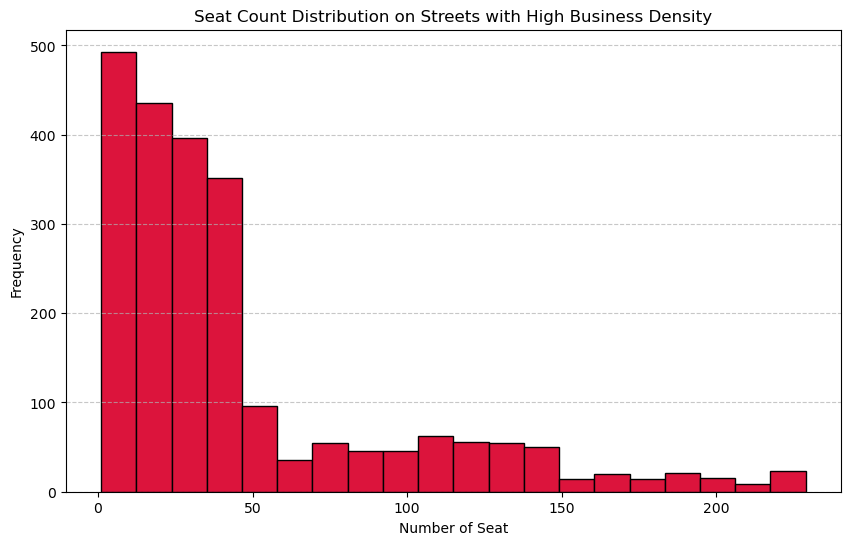

In [27]:
# filter data of streets with high business density
jalan_banyak_usaha = data[data['street_name'].isin(top_10_streets.index)]

# create figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# create histogram
ax.hist(jalan_banyak_usaha['number'], bins=20, color='crimson', edgecolor='black')

# add title and axes label
ax.set_title('Seat Count Distribution on Streets with High Business Density')
ax.set_xlabel('Number of Seat')
ax.set_ylabel('Frequency')

# add grid
ax.grid(axis='y', linestyle='--', alpha=0.7)

# show graphic
plt.show()

The histogram above displays the distribution of seat counts for dining establishments located on streets with a high concentration of businesses. 
The data used here includes only the top ten street names in Los Angeles based on the number of dining establishments.

From the chart, we can observe that the distribution of seat counts tends to peak within the 0–50 range, indicating that many eateries on these busy streets have relatively limited seating capacity. 
Beyond the 50-seat mark, the distribution becomes flatter and less pronounced, with fewer establishments offering a larger number of seats.

This distribution reflects the diversity in size and capacity among food establishments situated along the busiest streets in Los Angeles. 
It suggests that business owners have a wide range of options when planning their seating capacity, which can be tailored to customer preferences, operational needs, and overall business strategy.

[Back to Table of Contents](#back)

---
<a id="kesimpulan"></a>
# Conclusion

1. **Data Preparation**
- Column names have been standardized to snake_case format.
- The data type of the "chain" column has been converted to boolean.
- Null values have been cleaned.
- No duplicate records are present.
- Street names have been successfully extracted from the address column.

2. **Data Analysis**

- **Proportion of Different Business Types**  
Restaurants are the most dominant type of establishment, followed by Fast Food outlets and Cafés. Other types such as Pizza, Bar, and Bakery are also present, albeit in smaller proportions.

- **Proportion of Franchise vs Non-Franchise Businesses**  
The majority of dining establishments in Los Angeles are Non-Franchise, while Franchise businesses constitute a smaller portion. This highlights a key characteristic of the local food and beverage market.

- **Business Types Commonly Operated as Franchises**  
Restaurants are the most frequently operated franchise-based business type, with a significantly higher count compared to other categories.

- **Seat Count Distribution in Franchise-Based Businesses**  
Seat counts in franchise-based establishments tend to cluster around the 0–50 range, although there are also several venues with above-average seating capacity.

- **Average Number of Seats per Business Type**  
Restaurants have the highest average seat count, followed by Bars and Fast Food establishments.

- **Top Ten Streets by Business Count**  
Trousdale Parkway is the street with the highest number of dining establishments in Los Angeles, followed by North Grand Avenue and State University Drive.

- **Count of Streets with Only One Business**  
There are 7,484 streets in Los Angeles that host only a single dining establishment.

- **Seat Count Distribution on High-Density Streets**  
Among streets with a high number of businesses, most dining venues have relatively small seating capacities in the 0–50 range. Seat counts above 50 occur less frequently, reflecting the diversity in establishment size and capacity across the city.

This conclusion offers a comprehensive overview of the food and beverage market landscape in Los Angeles, highlighting the potential and key characteristics to consider for developing a café business that leverages robots as servers.

[Back to Table of Contents](#back)

---
<a id="rekomendasi"></a>
# Recommendation

Based on the above conclusions, several recommendations may be considered:

1. **Business Type**:  
**Restaurants** are the most dominant type of dining establishment in Los Angeles, making them a promising option for new ventures. 
Given the generally high seating capacity associated with restaurants, strategies aimed at maximizing available seating can be key to success. 
Offering a diverse and high-quality menu, while aligning the restaurant concept with local market preferences, may also serve as effective positioning strategies.

2. **Seating Capacity**:  
Restaurants with a higher average number of seats have the potential to attract more customers, particularly during peak hours or special events. 
As such, expanding seating capacity can help increase revenue potential. 
However, capacity planning must be carefully aligned with the establishment’s characteristics to maintain comfort and service quality.

3. **Franchise Development Opportunities**:  
Although the majority of dining establishments in Los Angeles are non-franchise businesses, there remains room for growth in the franchise segment—especially within the restaurant category. 
Franchise-based restaurants offer advantages such as strong brand support, proven operational systems, and access to broader resources. 
Nevertheless, success in this space requires a thorough market analysis and careful selection of a franchise brand to ensure long-term profitability.

By taking these recommendations into account, the development of a café that integrates robotic servers remains a compelling opportunity. 
The use of technology in café operations can improve efficiency while offering a unique customer experience. 
Moreover, by aligning the concept with existing market characteristics and evolving consumer trends, the café has the potential to become a sought-after destination in Los Angeles and to sustain long-term growth.

[Back to Table of Contents](#back)